# Tech challenge

## What to do?

**Exploratory data analysis**

- Get to know the domain
- Explore your data
- Clean your data
- Take a look and find connections between data
   
**Visualization**

- Plot your data in a meaningful way

**Predictions**

- Do you have any hypothesis?
- Can you make any kind of prediction: regression and/or classification?

**Storytelling**

- What metrics are you obtaining?
- Explain your conclusions
- Shape your new data and conclusions in such a way that is appealing to the listener and tells a story

**Extra:**

- **Enrich your dataset**


    - Add value: obtain related data by web scraping or with APIs.
    
    
- **Database**


    - Load the processed information into a database

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import klib
import functions_WIP as functions
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploratory Data Analysis

### Reading the file and storing the DataFrame in a variable:

In [2]:
data = pd.read_csv('/Users/Hector_Martin/Documents/Data Analysis/Bootcamp/careerweek_challenge/data-analytics-challenge/data/measurements.csv')
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


### Making a copy of the DataFrame to work with it

In [3]:
fuel = data.copy()

### Checking the Data Type and the NaN count per column:

In [4]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


### Checking the unique value counts per column, including the NaNs

In [5]:
for col in fuel.columns:
    print(col, fuel[col].value_counts(dropna=False))

distance 11,8    37
16      24
12,3    23
12,4    18
15,4    14
        ..
44,9     1
36,6     1
9,9      1
16,8     1
14,7     1
Name: distance, Length: 174, dtype: int64
consume 5       27
4,5     27
4,6     22
4,7     21
4,3     20
4,1     20
5,1     19
4,8     19
4,4     17
4       17
4,9     16
4,2     15
5,3     14
3,9     14
5,2     12
3,8     11
5,7     11
5,6     10
5,4      9
3,7      8
5,8      7
5,5      6
5,9      5
3,6      4
6,4      4
6,1      4
6,2      4
6        4
6,3      4
8,1      2
6,5      2
7,4      2
6,9      1
8,7      1
12,2     1
7,9      1
10,8     1
9,9      1
7,1      1
3,3      1
9        1
11,5     1
6,6      1
Name: consume, dtype: int64
speed 42    18
43    17
38    16
26    15
36    15
33    15
40    15
32    12
44    12
37    12
29    11
39    11
55    11
46    11
45    10
58    10
25    10
24     9
50     9
35     9
57     8
41     8
52     7
53     6
48     6
28     6
30     6
21     6
61     6
51     6
47     5
56     5
22     5
34     4
49     

### Transforming the Object variables into Numbers:

These columns below appear as Object type when they are either Integer or Float. Let's fix that:

- distance
- column
- temp_inside

Due to the fact that some numbers contain a comma instead of a dot as a decimal separator, once the values are transformed become NaN. We will have to replace those separators before.

In [6]:
def properfloats(x):
    if type(x) == str:
        if ',' in x:
            x = x.replace(',','.')
        return x

In [7]:
#getting a list with the columns to transform
cols_tonumbers = ['distance', 'consume', 'temp_inside']

In [8]:
for col in cols_tonumbers:
    fuel[col] = fuel[col].apply(properfloats)

In [9]:
for col in cols_tonumbers:
    fuel[col] = pd.to_numeric(fuel[col], errors = 'coerce')

In [10]:
fuel

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [11]:
fuel.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [12]:
fuel.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters     object
refill gas        object
dtype: object

We can confirm that the columns are properly transformed and that there are no additional NaNs after the transformation

In [13]:
fuel.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

So far, we can see that we will have to **remove the following columns** because these are **missing almost the entirety of the values**:

- specials
- refill liters
- refill gas

### Removing columns due to the high amount of NaNs

In [14]:
fuel = fuel.drop(['specials', 'refill liters', 'refill gas'], axis =1)

### Dealing with the NaN values of column 'temp_inside'

#### Let's replace the NaN values by the mean of all values within the column:

In [15]:
fuel['temp_inside'] = fuel['temp_inside'].fillna(np.mean(fuel['temp_inside']))

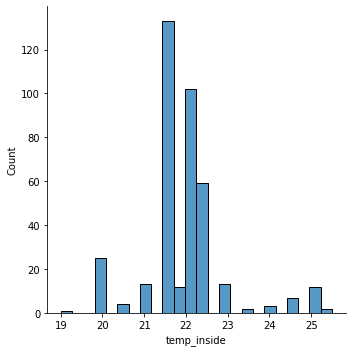

In [16]:
sns.displot(fuel['temp_inside'])
plt.show()

### Checking the Distribution on all Numerical columns:

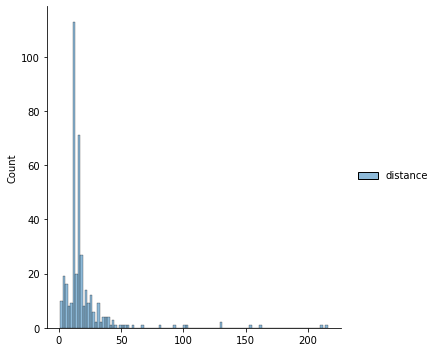

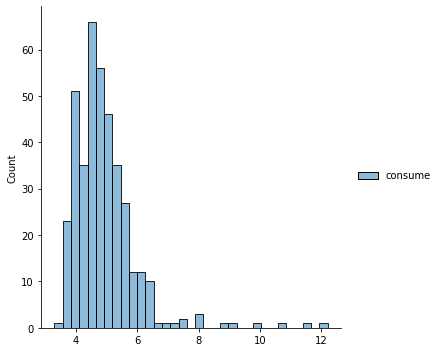

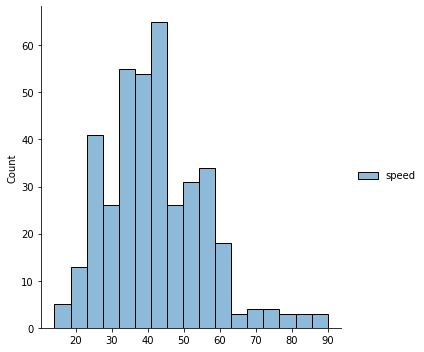

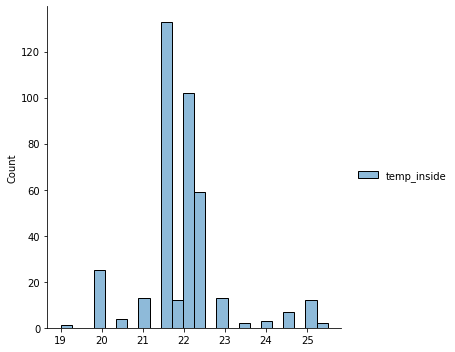

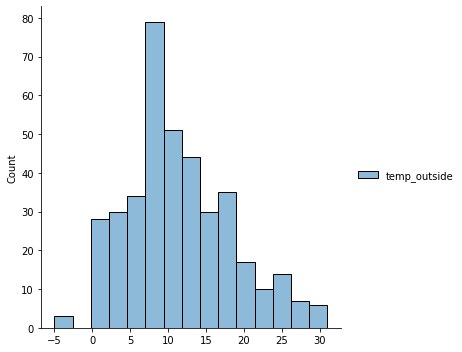

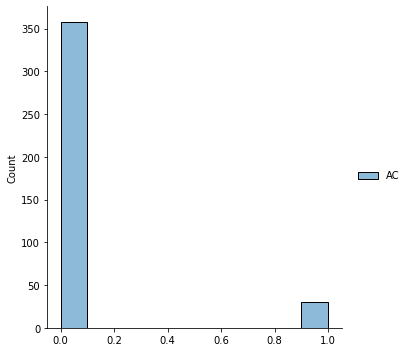

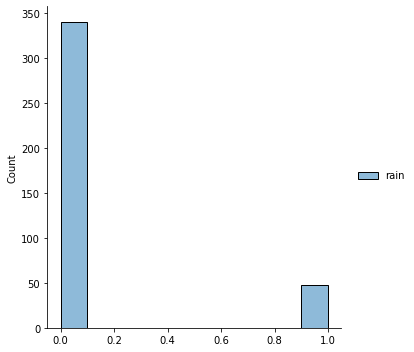

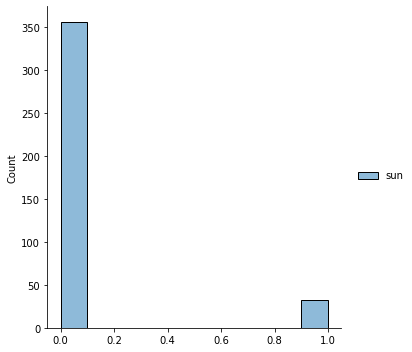

In [17]:
functions.plot_num(fuel)

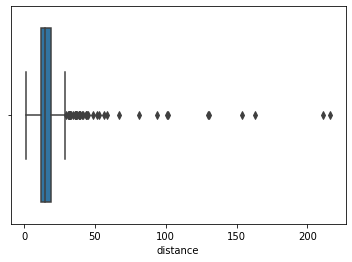

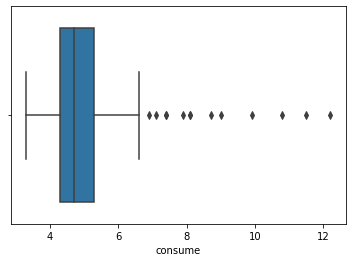

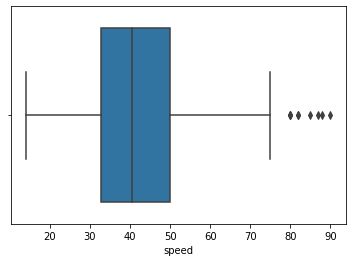

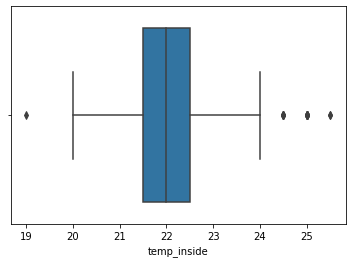

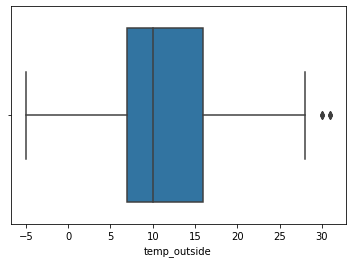

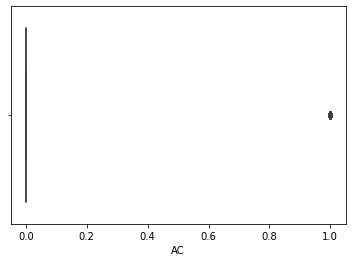

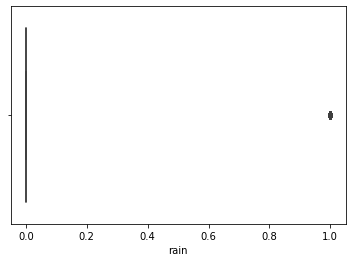

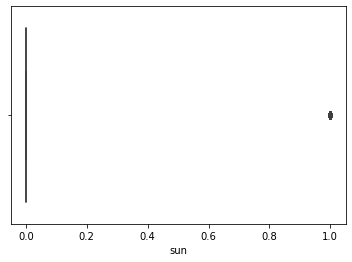

In [18]:
functions.boxplotting(fuel)

### Removing Outliers:

We will have to remove Outliers from the following Continuous Numerical columns, the rest of them are Discrete.

In [19]:
cols_outliers = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside']

#### Applying the function to remove Outliers:

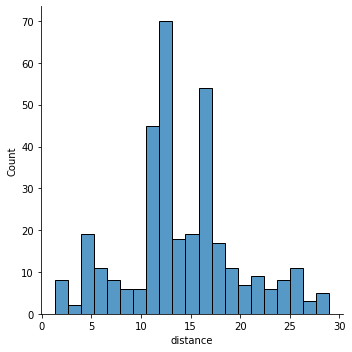

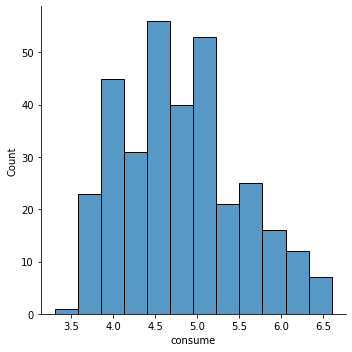

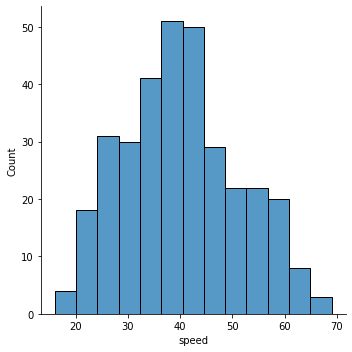

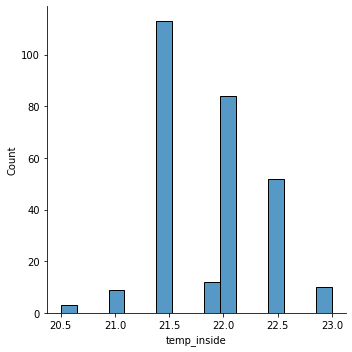

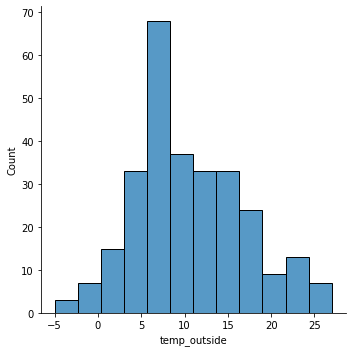

In [20]:
fuel = functions.outliers_out(fuel, cols_outliers)

In [21]:
#Current shape after removing Outliers
fuel.shape

(282, 9)

In [22]:
#Comparing with the Original dataframe
data.shape

(388, 12)

We have lost 106 rows but I believe that our model will benefit greatly from this, being more accurate at predicting the rest of the values, the distribution looks way more Gaussian now.

### Plotting a Countplot for the Categorical one:

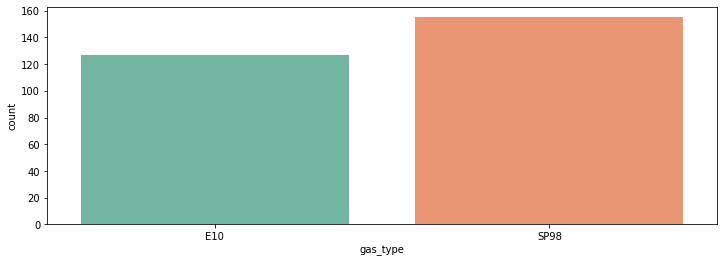

In [23]:
functions.countplot(fuel)

We can observe a slight Class imbalance, we will fix it later

### X - y Split:

Since we are going to find out which is the best Gas type, let's define our Independent and Dependent variables

In [24]:
X = fuel.drop(['gas_type'], axis =1)
y = fuel[['gas_type']]

### Train-Test Split:

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

In [26]:
#Transform NUMPY ARRAYS into dataframes

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,columns=X.columns)

We do not have any Object type column for this reason we will not make any Categorical and Numerical split.

#### Creating a copy of each DataFrame for Data Wrangling:

In [27]:
X_train_df = X_train_df.copy()
X_test_df = X_test_df.copy()

### Scaling variables with StandardScaler:

In [28]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler().fit(X_train_df.values)

#X_train:
X_train_standardized = stdscaler.transform(X_train_df.values)
X_train_standardized_df =pd.DataFrame(X_train_standardized, columns= X_train_df.columns, index = X_train_df.index)
print('DataFrame for X_train:')
print('-----------------------\n')
display(X_train_standardized_df)

#X_test:
X_test_standardized = stdscaler.transform(X_test_df.values)
X_test_standardized_df = pd.DataFrame(X_test_standardized, columns= X_test_df.columns, index = X_test_df.index)
print('DataFrame for X_test:')
print('-----------------------\n')
display(X_test_standardized_df)


DataFrame for X_train:
-----------------------



,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
135,0.511156,0.453932,-0.923588,-0.769618,-0.838090,-0.192006,-0.361460,-0.267261
141,-0.431853,0.878903,1.693869,-0.769618,0.390381,-0.192006,-0.361460,-0.267261
361,0.252291,-0.962638,0.478621,0.283374,0.697499,-0.192006,-0.361460,-0.267261
139,0.270781,0.878903,-1.484472,-0.769618,-0.530973,-0.192006,2.766559,-0.267261
282,0.252291,-1.387609,0.011218,0.283374,-0.377414,-0.192006,-0.361460,-0.267261
...,...,...,...,...,...,...,...,...
368,0.252291,-1.104295,0.291659,0.283374,1.618852,5.208167,-0.361460,-0.267261
150,0.400214,-1.104295,0.572101,-0.769618,-0.377414,-0.192006,-0.361460,-0.267261
66,-0.524305,-0.254353,0.104698,-0.769618,-0.684531,-0.192006,-0.361460,-0.267261
144,-0.524305,-0.962638,-0.269224,-0.769618,-0.070296,-0.192006,-0.361460,-0.267261


DataFrame for X_test:
-----------------------



,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
237,-0.062045,0.028961,-0.362705,1.336366,-0.070296,-0.192006,-0.361460,-0.267261
146,1.139828,-0.396010,0.478621,-0.769618,-0.070296,-0.192006,-0.361460,-0.267261
12,-0.431853,1.587188,1.787349,-0.769618,-0.070296,-0.192006,-0.361460,-0.267261
246,-0.302420,1.303874,-0.269224,1.336366,0.083263,-0.192006,2.766559,-0.267261
257,-0.413362,-0.112696,1.413427,1.336366,0.543940,-0.192006,-0.361460,3.741657
365,0.141349,-0.396010,1.132985,0.283374,2.386647,-0.192006,-0.361460,-0.267261
17,-0.524305,0.453932,-0.736627,-0.769618,-1.145208,-0.192006,-0.361460,-0.267261
177,-0.099026,0.737246,0.665582,-1.822609,-2.066562,-0.192006,-0.361460,-0.267261
22,0.603608,1.303874,-0.269224,-0.769618,-1.452326,-0.192006,-0.361460,-0.267261
239,0.418704,-0.396010,0.759063,1.336366,-0.223855,-0.192006,-0.361460,3.741657


### Oversampling y to correct Class imbalance:

In [29]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train_standardized_df, y_train)
display(pd.concat([X_train_over,y_train_over],axis=1).head())

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type
0,0.511156,0.453932,-0.923588,-0.769618,-0.838090,-0.192006,-0.361460,-0.267261,SP98
1,-0.431853,0.878903,1.693869,-0.769618,0.390381,-0.192006,-0.361460,-0.267261,E10
2,0.252291,-0.962638,0.478621,0.283374,0.697499,-0.192006,-0.361460,-0.267261,SP98
3,0.270781,0.878903,-1.484472,-0.769618,-0.530973,-0.192006,2.766559,-0.267261,E10
4,0.252291,-1.387609,0.011218,0.283374,-0.377414,-0.192006,-0.361460,-0.267261,SP98


In [30]:
#Let's check the class balance before and after the Oversampling:

print('Before Oversampling: \n')
print(y_train.value_counts())
print('\n-----------------------\n')
print('After Oversampling: \n')
print(y_train_over.value_counts())

Before Oversampling: 

gas_type
SP98        127
E10          98
dtype: int64

-----------------------

After Oversampling: 

gas_type
E10         127
SP98        127
dtype: int64


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train_over, y_train_over.values.ravel())

print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_over, y_train_over.values)))
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test_standardized_df, y_test.values)))

y_pred_train = clf.predict(X_train_over)
y_pred_test = clf.predict(X_test_standardized_df)

display(y_test.value_counts())

The Accuracy for the Random Forest in the TRAIN set is 0.67
The Accuracy for the Random Forest in the TEST  set is 0.56


gas_type
E10         29
SP98        28
dtype: int64

ACCURACY SCORE:

The accuracy in the TRAIN set is: 0.669
The accuracy in the TEST  set is: 0.561

-------------------------------------------------

PRECISSION SCORE:

The precission in the TRAIN set is: 0.678
The precission in the TEST  set is: 0.567

-------------------------------------------------

RECALL SCORE:

The recall in the TRAIN set is: 0.646
The recall in the TEST  set is: 0.586

-------------------------------------------------

F1 SCORE:

The F1-score for the TRAIN set is 0.66
The F1-score for the TEST set is 0.58

-------------------------------------------------

KAPPA SCORE:

The Kappa in the TRAIN set is: 0.34
The Kappa in the TEST set is: 0.12

-------------------------------------------------

CLASSIFICATION REPORT FOR TRAIN SET:

              precision    recall  f1-score   support

          No       0.68      0.65      0.66       127
         Yes       0.66      0.69      0.68       127

    accuracy                           0.67       254
   macro avg       0

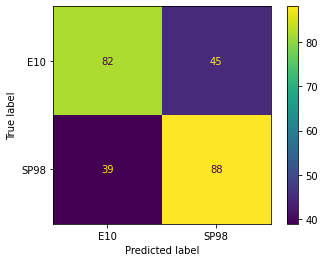

The Confusion Matrix on Test set:


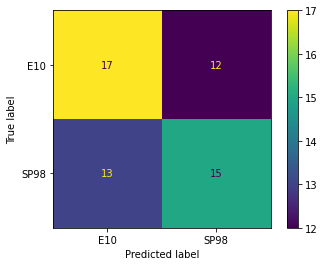

In [39]:
functions.log_class_scores(awa, y_train_over, y_pred_train, y_test, y_pred_test, 'E10')